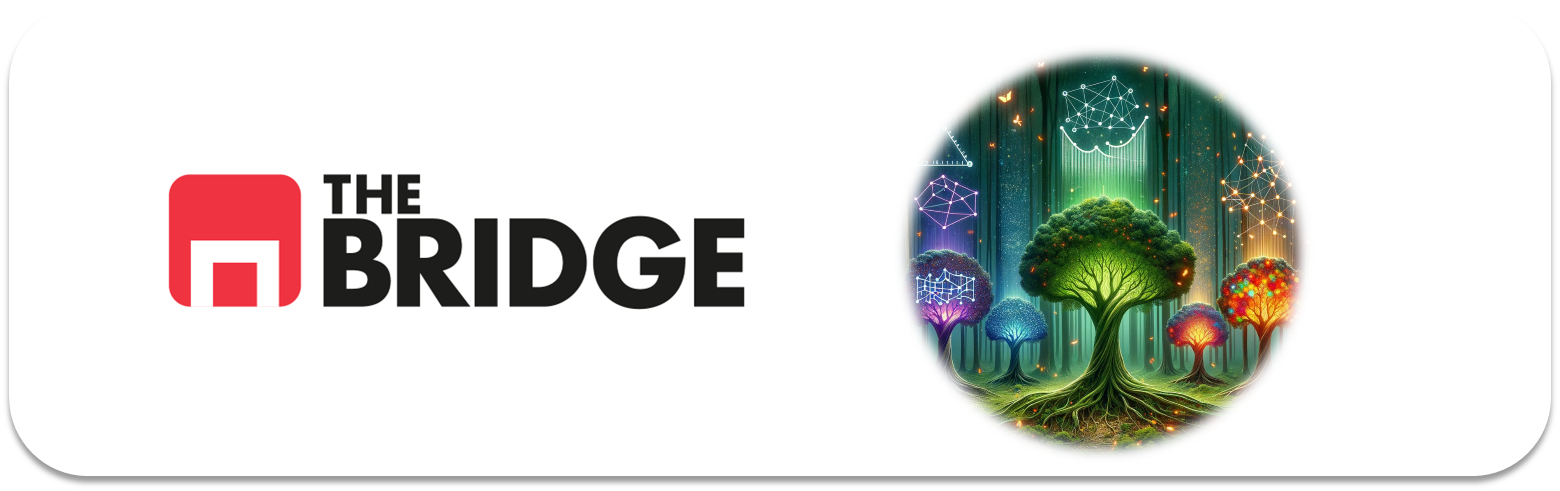

## PRACTICA OBLIGATORIA: **Ensamblado de modelos, bagging, boosting, random forest y gbts**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de obtención del mejor modelo para la resolución de un problema de clasificación sobre diabetes en la india. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import bootcampviztools as bt
import pandas as pd
import numpy as np
import seaborn as sns

### Descripción del dataset

El dataset de los Pima Indians Diabetes contiene datos de un grupo de mujeres de al menos 21 años de edad de ascendencia india Pima que viven cerca de Phoenix, Arizona, EE. UU. Las características del dataset incluyen varios predictores médicos y un objetivo que indica si la paciente desarrolló diabetes dentro de cinco años.

### Características del Dataset

Las variables incluidas en el dataset son:

1. **Número de Embarazos**: Cantidad de veces embarazada.
2. **Concentración de Glucosa en Plasma**: Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia oral a la glucosa.
3. **Presión Arterial Diastólica**: Presión arterial diastólica (mm Hg).
4. **Grosor del Pliegue Cutáneo del Tríceps**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulina en Suero**: Insulina en suero a 2 horas (mu U/ml).
6. **Índice de Masa Corporal**: Peso en kg/(altura en m)^2.
7. **Función del Pedigree de Diabetes**: Una función que representa la predisposición genética a la diabetes.
8. **Edad**: Edad en años.
9. **Variable Objetivo**: Indica si la paciente desarrolló diabetes (1) o no (0).

### Carga de datos

El dataset lo puedes encontrar en la siguiente url y a continuación se proporciona una lista de nombres sugeridos para las columnas:


In [24]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'press', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

### Enunciado

Construye el mejor modelo que puedas para predecir a partir de los datos de entrada si una mujer de la tribu Pima desarrollará diabetes. Para ello obtén al menoss tres modelos a partir de tecnologías de bagging y boosting (al menos uno de cada), compáralos sin utilizar el test y selecciona uno de ellos como el mejor (justificándolo). Termina el ejercicio probando el modelo seleccionado y con sus hiperparámetros optimizados contra un dataset de test que deberás haber reservado con anterioridad.

In [25]:
df = pd.read_csv(url, header = None, names = names) ## le pone eso para que exista nombres de columnas si no me saldría sin columnas
df

preg  plas  press  skin  test  mass   pedi  age  class
0       6   148     72    35     0  33.6  0.627   50      1
1       1    85     66    29     0  26.6  0.351   31      0
2       8   183     64     0     0  23.3  0.672   32      1
3       1    89     66    23    94  28.1  0.167   21      0
4       0   137     40    35   168  43.1  2.288   33      1
..    ...   ...    ...   ...   ...   ...    ...  ...    ...
763    10   101     76    48   180  32.9  0.171   63      0
764     2   122     70    27     0  36.8  0.340   27      0
765     5   121     72    23   112  26.2  0.245   30      0
766     1   126     60     0     0  30.1  0.349   47      1
767     1    93     70    31     0  30.4  0.315   23      0

[768 rows x 9 columns]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   press   768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
df.nunique()

preg      17
plas     136
press     47
skin      51
test     186
mass     248
pedi     517
age       52
class      2
dtype: int64

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'age'}>]], dtype=object)

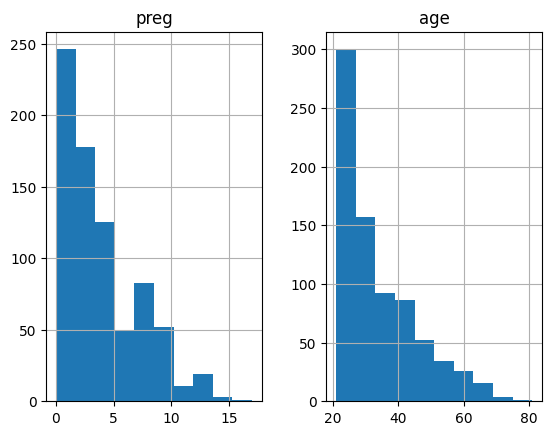

In [28]:
df[["preg","age"]].hist()

In [29]:

df.preg.value_counts()

preg
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
17      1
15      1
Name: count, dtype: int64

In [30]:
target = "class"

In [31]:
features_num = df.columns.to_list() # features numercias todas. 
features_num.remove(target) #quitamos el target

In [32]:

features_num

['preg', 'plas', 'press', 'skin', 'test', 'mass', 'pedi', 'age']

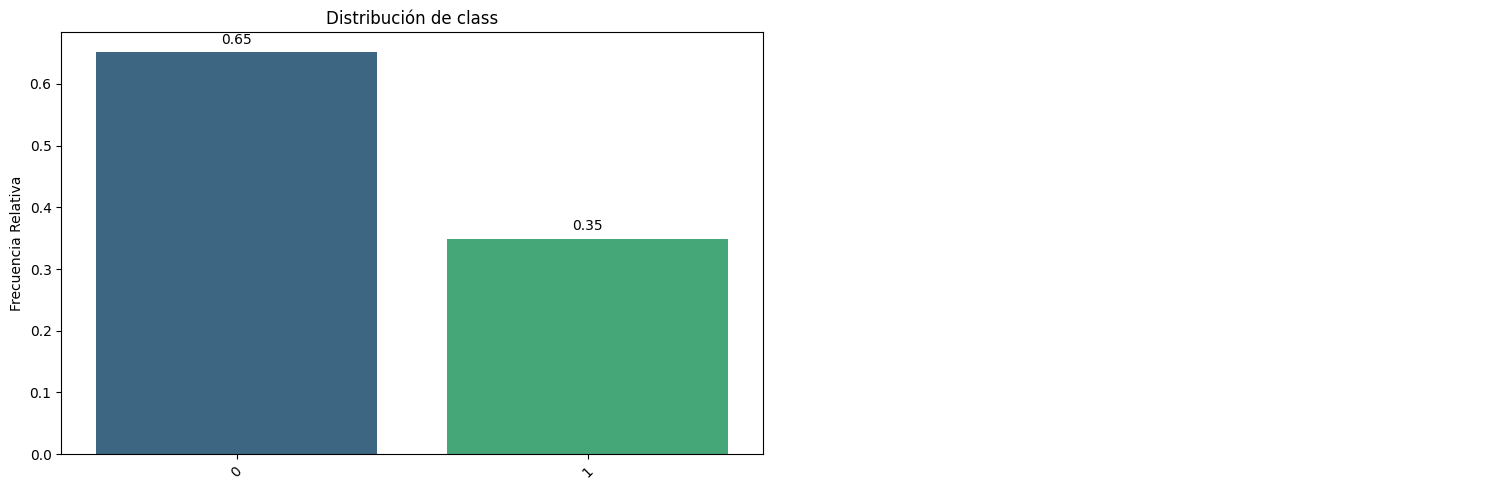

In [33]:

bt.pinta_distribucion_categoricas(df, [target], mostrar_valores= True, relativa= True)
# es un target categorico y lo queremos ver con frecuencia relativa

In [68]:
# estamos un poquito desbalan
#################################

In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [70]:

train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 60 to 102
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    614 non-null    int64  
 1   plas    614 non-null    int64  
 2   press   614 non-null    int64  
 3   skin    614 non-null    int64  
 4   test    614 non-null    int64  
 5   mass    614 non-null    float64
 6   pedi    614 non-null    float64
 7   age     614 non-null    int64  
 8   class   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.0 KB


In [71]:
###################

In [72]:

tienen_nulos = ["plas","press","skin","test","mass"]  #intervenccion de david en la que explica porq hay nulos 
#sacado del video 

In [59]:
train_set[tienen_nulos] = train_set[tienen_nulos].replace(0, np.nan)
test_set[tienen_nulos] = test_set[tienen_nulos].replace(0, np.nan)

In [60]:

df[tienen_nulos].median()

plas     117.0
press     72.0
skin      23.0
test      30.5
mass      32.0
dtype: float64

In [61]:
##################

In [62]:

# df.fillna(serie_medianas, axis=1)

In [63]:
from sklearn.impute import SimpleImputer

# 3. Imputamos la mediana en las columnas con missings (fit solo sobre train, transform sobre ambas)
imp = SimpleImputer(strategy="median")

train_set[tienen_nulos] = imp.fit_transform(train_set[tienen_nulos])
test_set[tienen_nulos]  = imp.transform(test_set[tienen_nulos])

In [64]:
train_set[tienen_nulos].isna().sum()

plas     0
press    0
skin     0
test     0
mass     0
dtype: int64

In [65]:
##################

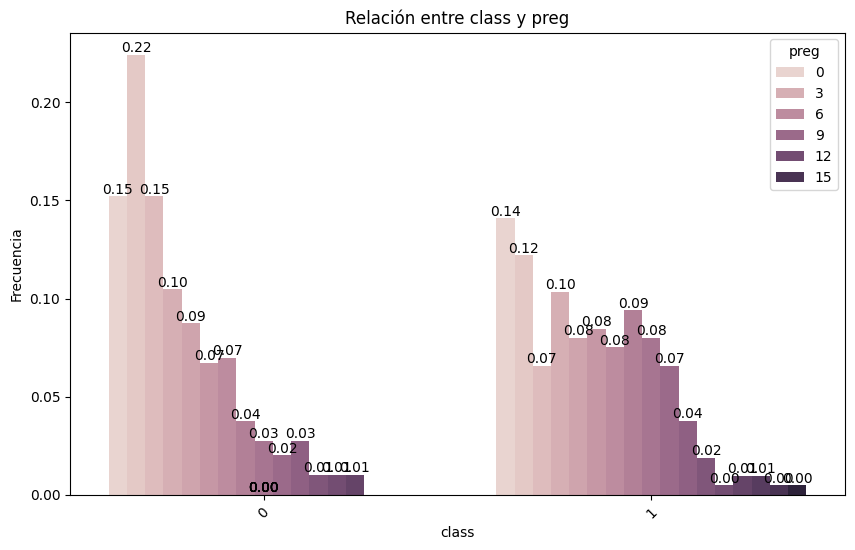

In [66]:
bt.plot_categorical_relationship_fin(train_set, target, "preg", relative_freq= True, show_values= True)

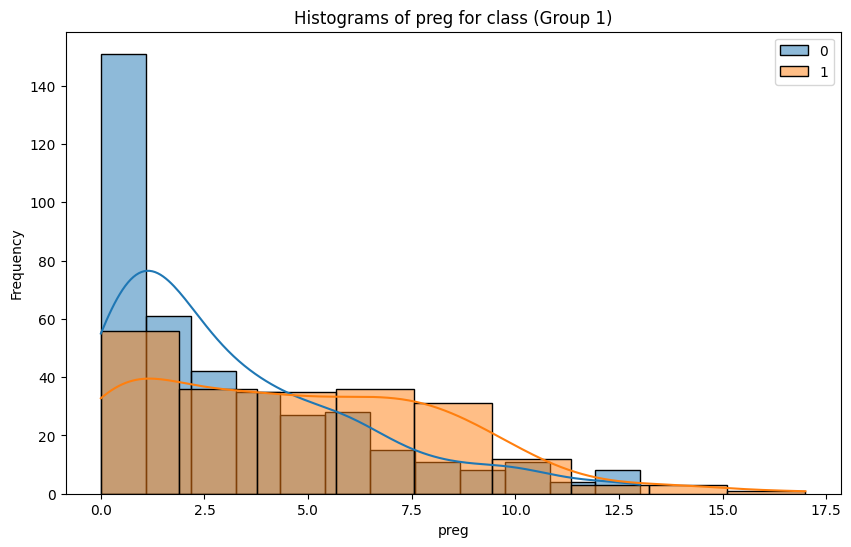

In [67]:

bt.plot_grouped_histograms(train_set, cat_col= target, num_col= "preg", group_size= 3)

In [45]:

features_num

['preg', 'plas', 'press', 'skin', 'test', 'mass', 'pedi', 'age']

In [ ]:

# sns.pairplot(train_set, hue=target) # podemos usarlo para ver como discriminan los diferentes histogramas frente al objetivo

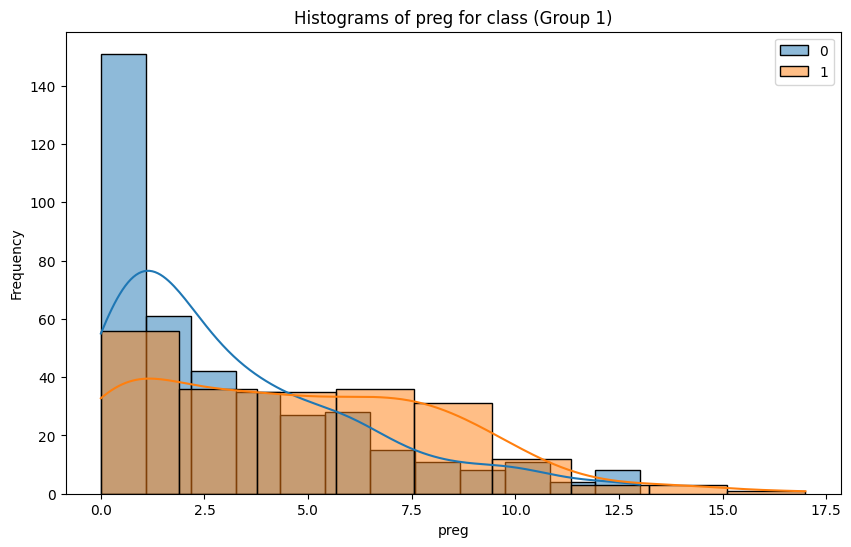

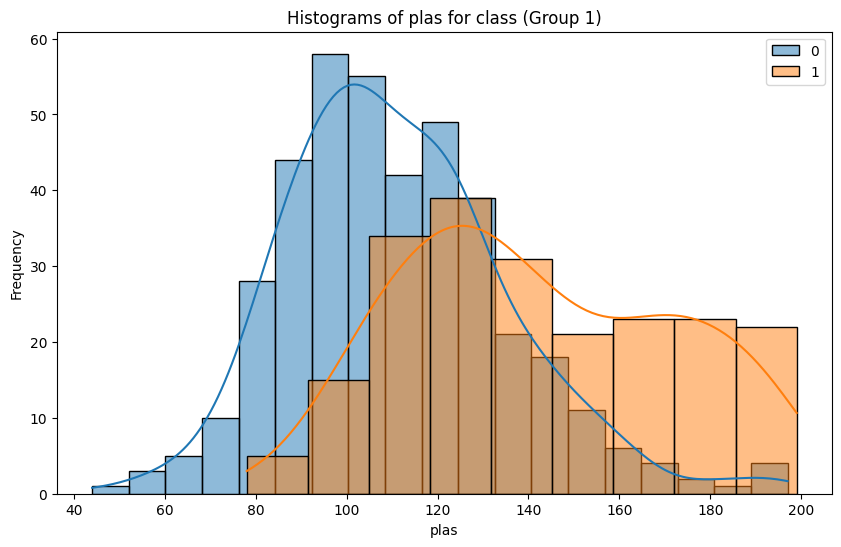

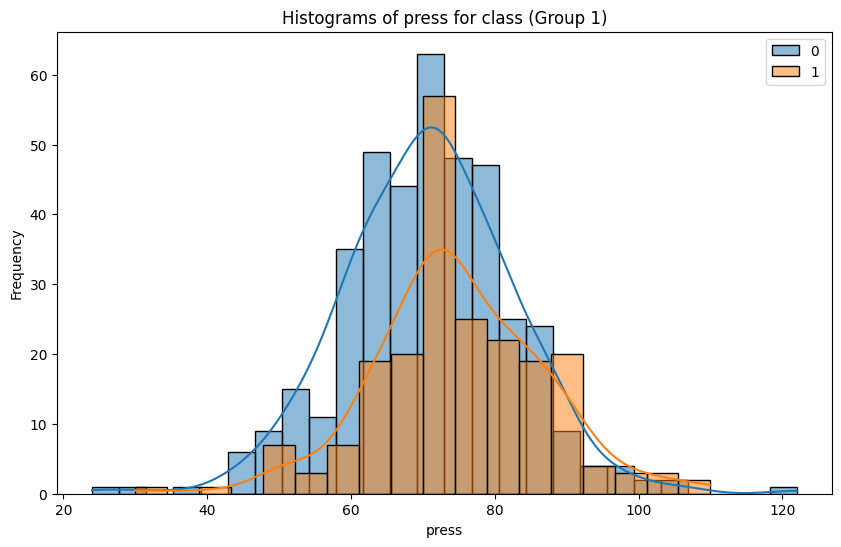

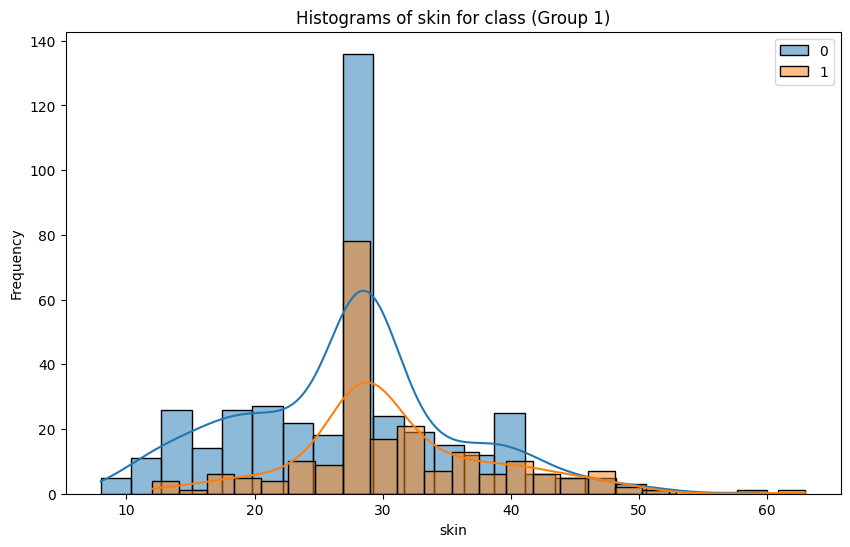

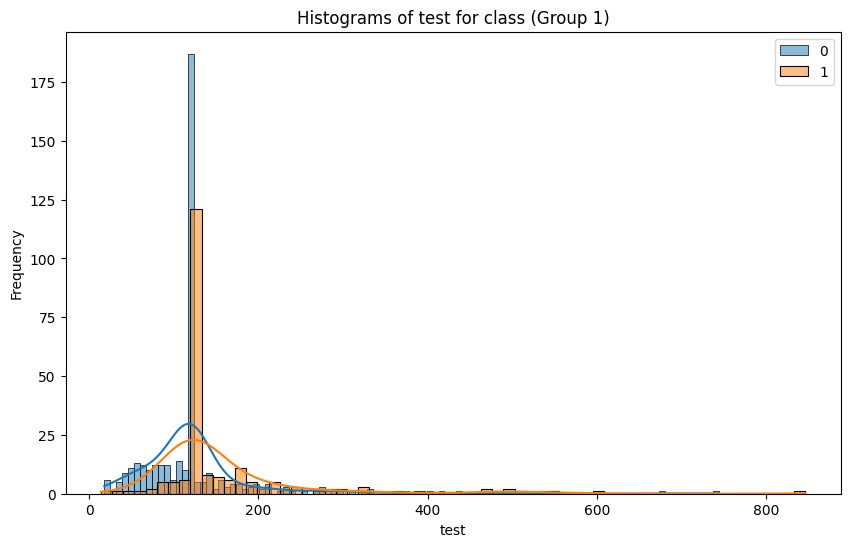

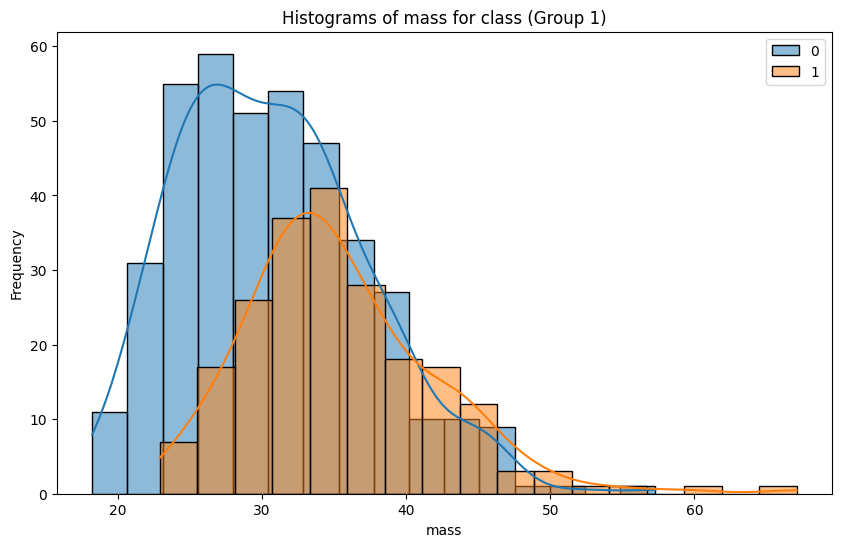

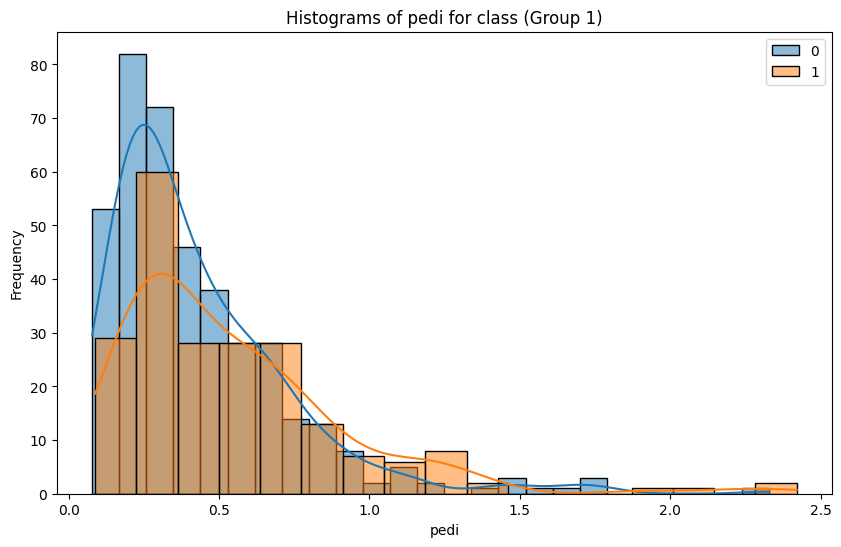

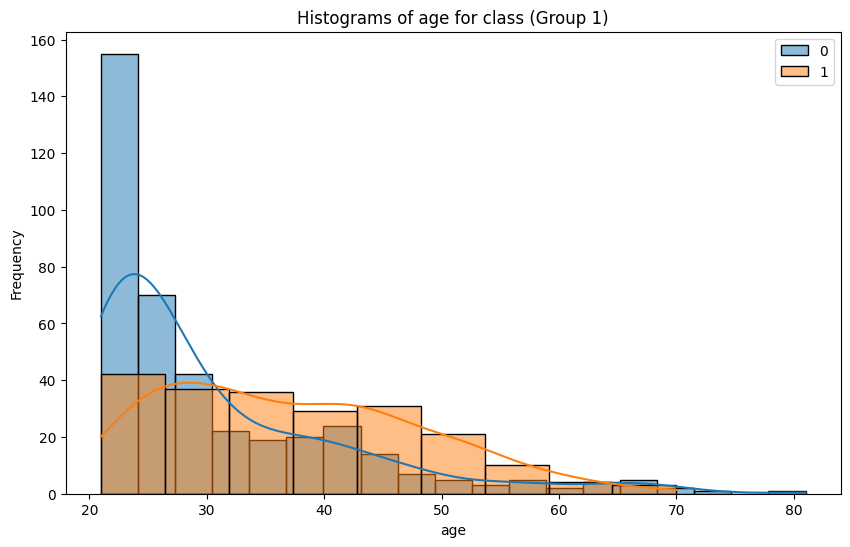

In [46]:
for col in features_num:
    bt.plot_grouped_histograms(train_set, cat_col= target, num_col= col, group_size= 3) #hacrmos un bucle para hacer eso
    

In [47]:
# features_num_sel1 = ["age", "plas", "preg", "mass"]
# features_num_sel2 = features_num - features_num_sel1

In [48]:
X_train = train_set[features_num]
y_train = train_set[target]

X_test = test_set[features_num]
y_test = test_set[target]

In [49]:

X_train

preg   plas  press  skin   test  mass   pedi  age
60      2   84.0   72.0  28.5  120.0  32.0  0.304   21
618     9  112.0   82.0  24.0  120.0  28.2  1.282   50
346     1  139.0   46.0  19.0   83.0  28.7  0.654   22
294     0  161.0   50.0  28.5  120.0  21.9  0.254   65
231     6  134.0   80.0  37.0  370.0  46.2  0.238   46
..    ...    ...    ...   ...    ...   ...    ...  ...
71      5  139.0   64.0  35.0  140.0  28.6  0.411   26
106     1   96.0  122.0  28.5  120.0  22.4  0.207   27
270    10  101.0   86.0  37.0  120.0  45.6  1.136   38
435     0  141.0   72.0  28.5  120.0  42.4  0.205   29
102     0  125.0   96.0  28.5  120.0  22.5  0.262   21

[614 rows x 8 columns]

In [50]:
from sklearn.ensemble import RandomForestClassifier # bagging - boostrap aggregation
from xgboost import XGBClassifier # boosting es muy interesante y su dcumnetaciojn explica muy bien  
from lightgbm import LGBMClassifier # boosting

base_clf = RandomForestClassifier(max_depth = 5, random_state= 42)

In [51]:

cross_val_score(base_clf, X_train, y_train, cv = 5, scoring= "balanced_accuracy")

array([0.68738977, 0.76482558, 0.71031977, 0.69244186, 0.73630952])

In [52]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

print("Recall medio:", np.mean(cross_val_score(base_clf, X_train, y_train, cv = 5, scoring= "balanced_accuracy")))

Recall medio: 0.7182573007669907


In [ ]:

base_clf

In [ ]:

base_clf.fit(X_train, y_train) # Para el feature Importance

In [ ]:

print(classification_report(y_train, base_clf.predict(X_train)))

In [ ]:

base_clf.feature_importances_

In [ ]:

base_clf.feature_names_in_

In [ ]:
pd.DataFrame({"features": base_clf.feature_names_in_, "importance": base_clf.feature_importances_}).sort_values("importance",ascending = False)